# Investment Diversification

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In [13]:
print('This notebook also gives some guides for using yfinance')

This notebook also gives some guides for using yfinance


In [14]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
sns.set_style('darkgrid')

import yfinance as yf

In [15]:
#load data for Ford (F) and General Motors (GM) stock
tickers = ['F', 'GM']

start_date = dt.datetime.today()-dt.timedelta(days = 200)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end =end_date)

[*********************100%***********************]  2 of 2 completed


In [16]:
stock.head()

Price           Close                  High                   Low             \
Ticker              F         GM          F         GM          F         GM   
Date                                                                           
2024-11-01   9.623500  50.716194   9.802410  51.532271   9.604667  50.547009   
2024-11-04   9.755327  51.552174   9.953070  52.517534   9.632915  50.746051   
2024-11-05   9.981320  53.443085  10.018986  53.482894   9.698830  51.263560   
2024-11-06  10.536883  54.786625  10.574549  55.115048  10.207312  52.885763   
2024-11-07  10.460529  55.124996  10.603693  55.662414  10.336454  53.940691   

Price            Open                Volume            
Ticker              F         GM          F        GM  
Date                                                   
2024-11-01   9.727079  50.905288   43472300  10289500  
2024-11-04   9.632915  50.746051   55323800   9778500  
2024-11-05   9.727079  51.412844   49309000  11534000  
2024-11-06  10.310891  54.219352  100781800  19150100  
2024-11-07  10.508251  54.866242   55407900  10964800

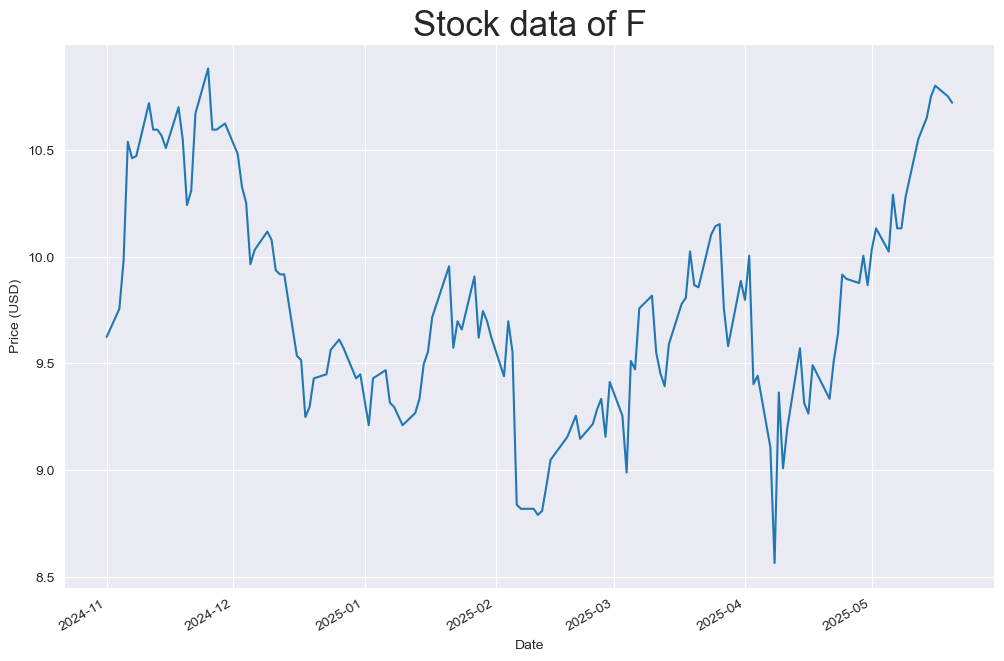

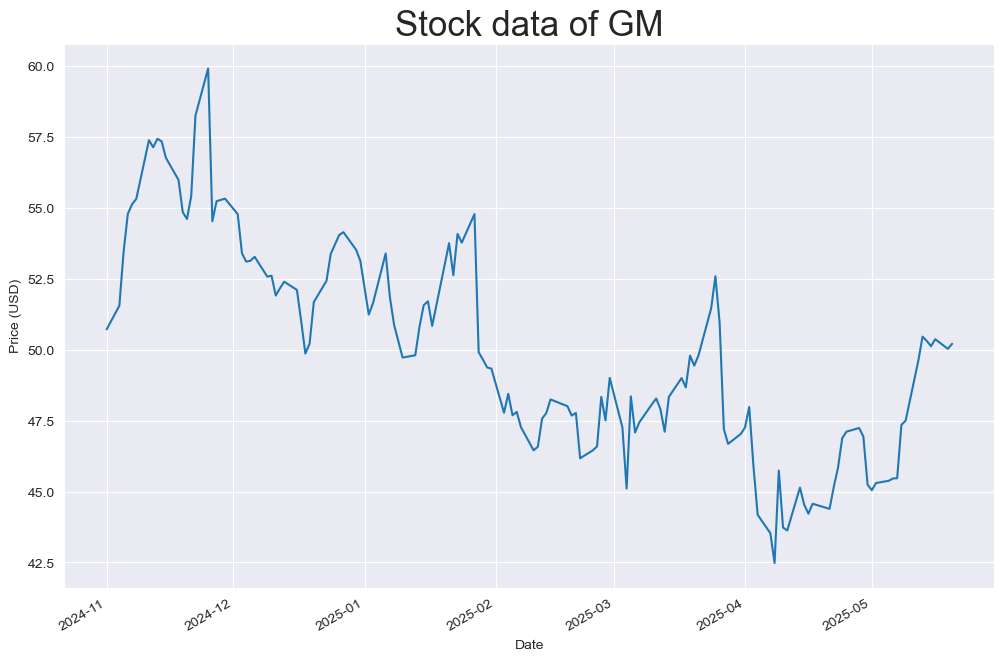

In [17]:
#Plot Closing Price of Ford and GM stock data
ticker = 'F'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'GM'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()


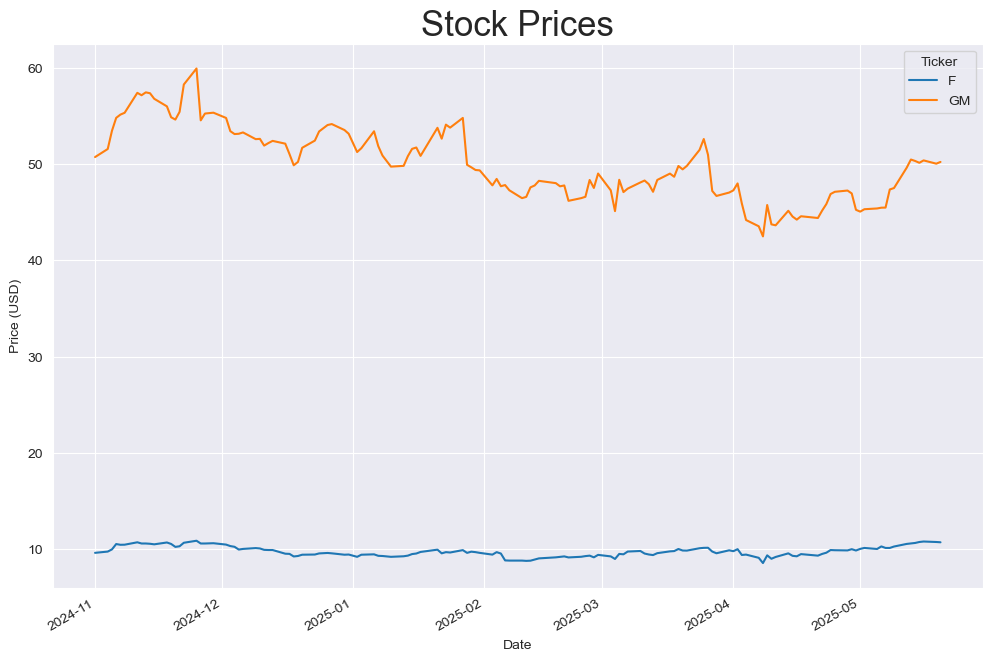

In [18]:
#Plot stock prices together
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices', size = 25)
plt.ylabel('Price (USD)')
plt.show()


In [19]:
#Add in column to stock data that is cumulative returns of the stocks

# Step 1: Compute cumulative return from 'Close' prices
close = stock['Close']
normalized_returns = close/close.iloc[0]-1 #Moves stock prices to a start of 0


# Step 2: Create MultiIndex columns for new data
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

# Step 3: Concatenate to the original DataFrame
stock = pd.concat([stock, normalized_returns], axis =1 )


In [20]:
normalized_returns

Cumulative Return          
Ticker                     F        GM
Date                                  
2024-11-01          0.000000  0.000000
2024-11-04          0.013698  0.016483
2024-11-05          0.037182  0.053768
2024-11-06          0.094912  0.080259
2024-11-07          0.086978  0.086931
...                      ...       ...
2025-05-14          0.106666 -0.008009
2025-05-15          0.117057 -0.011756
2025-05-16          0.122253 -0.006826
2025-05-19          0.117057 -0.013530
2025-05-20          0.113940 -0.009981

[136 rows x 2 columns]

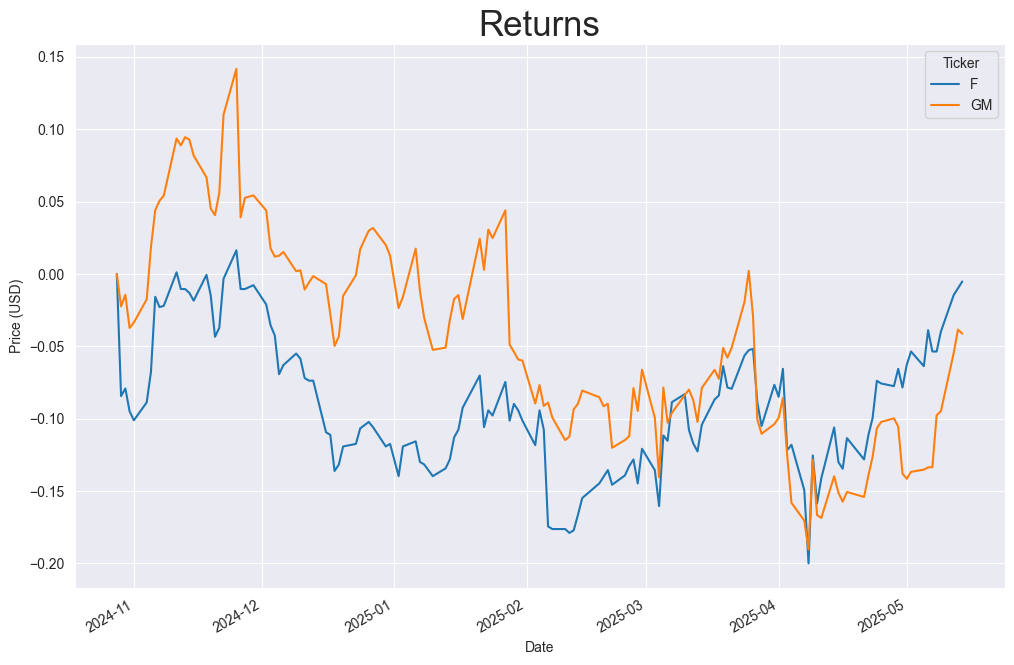

In [19]:
#Plot Cumlative Returns together
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Returns', size = 25)
plt.ylabel('Price (USD)')
plt.show()


In [21]:
print('Typical method of finding volatility is to find the (log) daily returns take standard deviation and then multiply by sqrt(252) to give the yearly volatility.')

Typical method of finding volatility is to find the (log) daily returns take standard deviation and then multiply by sqrt(252) to give the yearly volatility.


In [24]:
Ford_close = stock['Close']['F']

In [26]:
Ford_daily_log_returns = np.log(stock['Close']['F']/stock['Close']['F'].shift(1))

In [28]:
Ford_daily_log_returns = Ford_daily_log_returns.dropna()

In [29]:
Ford_daily_log_returns

Date
2024-10-29   -0.088211
2024-10-30    0.005747
2024-10-31   -0.017342
2024-11-01   -0.006826
2024-11-04    0.013606
                ...   
2025-05-08    0.000000
2025-05-09    0.014486
2025-05-12    0.025926
2025-05-13    0.004728
2025-05-14    0.004706
Name: F, Length: 135, dtype: float64

In [30]:
print(f'Volatility of Ford is then {np.std(Ford_daily_log_returns)*np.sqrt(252)}')

Volatility of Ford is then 0.3727180608961496


In [31]:
# Plot the cumulative returns of the following stocks over the last two years

tickers = ['AMZN', 'MSFT', 'GOOG', 'HD', 'GM']

start_date = dt.datetime.today()-dt.timedelta(days = 2*365)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

[*********************100%***********************]  5 of 5 completed


In [32]:
stock.head()

Price            Close                                                 \
Ticker            AMZN         GM        GOOG          HD        MSFT   
Date                                                                    
2023-05-16  113.400002  30.877916  119.523865  268.357727  306.859528   
2023-05-17  115.500000  31.759022  120.907326  277.919891  309.759796   
2023-05-18  118.150002  32.209370  122.937698  280.552795  314.218781   
2023-05-19  116.250000  31.974407  122.668983  276.484619  314.041199   
2023-05-22  115.010002  32.170200  125.276634  276.275482  316.842896   

Price             High                                                 ...  \
Ticker            AMZN         GM        GOOG          HD        MSFT  ...   
Date                                                                   ...   
2023-05-16  114.790001  31.563223  120.628633  271.931657  308.798687  ...   
2023-05-17  115.830002  31.905874  121.703550  279.497714  310.183982  ...   
2023-05-18  118.599998  32.268108  123.315912  281.284678  314.731778  ...   
2023-05-19  118.309998  32.473700  125.882758  281.123117  314.445666  ...   
2023-05-22  116.769997  32.238731  126.451072  278.490160  318.233859  ...   

Price             Open                                                 \
Ticker            AMZN         GM        GOOG          HD        MSFT   
Date                                                                    
2023-05-16  111.050003  31.387001  116.279239  267.806443  304.979426   
2023-05-17  114.889999  31.142247  119.613451  268.186640  308.072896   
2023-05-18  116.690002  31.602382  120.986939  278.167004  310.282670   
2023-05-19  118.160004  32.424750  123.614502  281.123117  312.462799   
2023-05-22  116.769997  32.023348  122.927759  276.342025  314.297748   

Price         Volume                                          
Ticker          AMZN        GM      GOOG        HD      MSFT  
Date                                                          
2023-05-16  71472900  11069600  32370100  12362100  26730300  
2023-05-17  65655200  11269500  26659600   7956900  24315000  
2023-05-18  73174100  14241000  27014500   4547000  27276000  
2023-05-19  54990200  12598700  30251300   4469900  27529500  
2023-05-22  70741100   8866400  29760200   3736200  24115700  

[5 rows x 25 columns]

In [35]:
#Create a dataframe of daily returns
#It is quite common to take the logs of daily returns to lessen computational complexity in standard deviation
daily_returns = np.log(stock['Close']/stock['Close'].shift(1))
daily_returns = daily_returns.dropna()



#Create a dictionary of standard deviations of daily return
#Normalize the standard deviation for yearly by multiplying by sqrt(#trading days in year ~ 252)
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in tickers}

In [36]:
annualized_volatility

{'AMZN': 0.31594980138843315,
 'MSFT': 0.23462487152119038,
 'GOOG': 0.2971232674329147,
 'HD': 0.21319918074160651,
 'GM': 0.3353186488257185}

In [37]:
# Calculate the covariance matrix
covariance_matrix = 252*((daily_returns).cov())

In [38]:
covariance_matrix

Ticker,AMZN,GM,GOOG,HD,MSFT
Ticker,,,,,
AMZN,0.100024,0.025007,0.056696,0.022829,0.048609
GM,0.025007,0.112664,0.019239,0.030947,0.014650
GOOG,0.056696,0.019239,0.088459,0.011300,0.038274
HD,0.022829,0.030947,0.011300,0.045545,0.012489
MSFT,0.048609,0.014650,0.038274,0.012489,0.055159


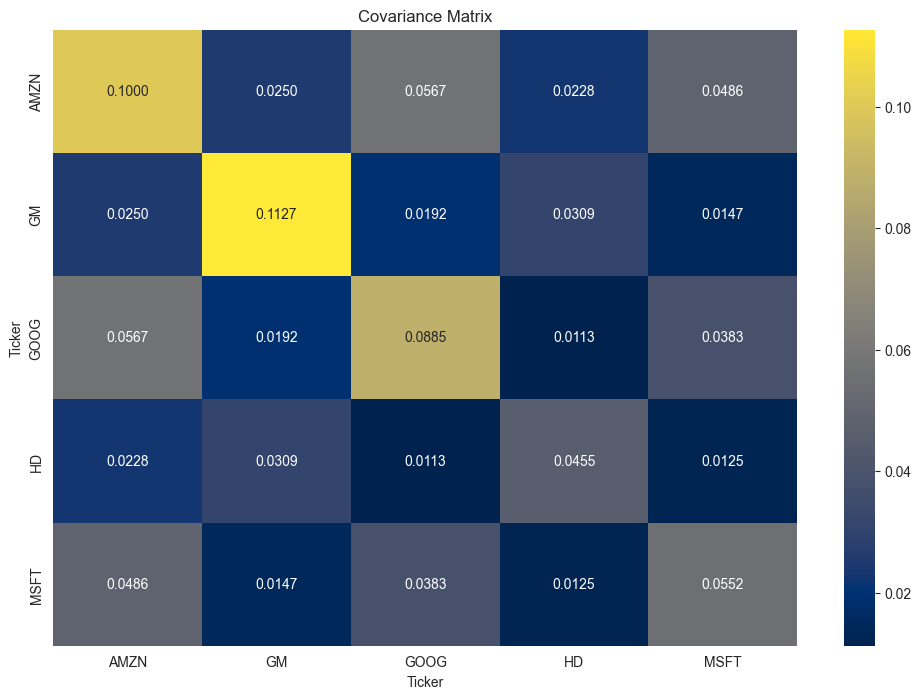

In [41]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix')
plt.show()

In [42]:
#Find a set of weights, equivalently portfolio investment percentages in stock_symbols, 
#which minimizes a historical portfolio's volatility subject to the following investment constraints
#1) Must invest at least 10% of capital into each index
#2) Cannot invest more than 35% of capital into a single index

#Create dictionary average/expected daily return for indexes in stock_symbols normalized for yearly return
#expected_returns = {stock: 252*np.mean(returns[stock]) for stock in stock_symbols}


# Number of assets
n_assets = len(tickers)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights = np.array([1/n_assets] * n_assets)

# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 3% of capital into each index in stock_symbols
#Do not allocate more than 35% of capital into each index in stock_symbol
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .35-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result = minimize(portfolio_volatility, initial_weights, constraints=constraints)

# Optimal asset weights
optimal_weights = result.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
AMZN: Weight = 0.1000
MSFT: Weight = 0.1137
GOOG: Weight = 0.1001
HD: Weight = 0.3500
GM: Weight = 0.3362


In [45]:
print(f' The optimal volatility subject to the constraints is {result.fun}')

 The optimal volatility subject to the constraints is 0.17904028272476993


In [46]:
annualized_volatility

{'AMZN': 0.31594980138843315,
 'MSFT': 0.23462487152119038,
 'GOOG': 0.2971232674329147,
 'HD': 0.21319918074160651,
 'GM': 0.3353186488257185}